In [1]:
library(readr)
library(WVPlots)
library(dplyr)
library(ggplot2)
library(tidyr)
library(stringr)

Warning message:
"package 'WVPlots' was built under R version 3.6.3"
Loading required package: wrapr

Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following object is masked from 'package:wrapr':

    coalesce


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
shows <- read_csv('shows.csv') %>% mutate(Rotten_Tomatoes = Rotten_Tomatoes/10)
glimpse(shows)

Warning message:
"Missing column names filled in: 'X1' [1]"
Parsed with column specification:
cols(
  X1 = col_double(),
  Title = col_character(),
  Year = col_double(),
  Age = col_character(),
  IMDb = col_double(),
  Rotten_Tomatoes = col_double(),
  Streamings = col_character(),
  Genre = col_character()
)



Rows: 462
Columns: 8
$ X1              <dbl> 0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16,~
$ Title           <chr> "breaking bad", "stranger things", "sherlock", "better~
$ Year            <dbl> 2008, 2016, 2010, 2015, 2005, 2011, 2005, 2013, 2005, ~
$ Age             <chr> "18+", "16+", "16+", "18+", "16+", "18+", "16+", "18+"~
$ IMDb            <dbl> 9.5, 8.8, 9.1, 8.7, 8.9, 8.8, 8.4, 8.8, 9.2, 8.2, 8.7,~
$ Rotten_Tomatoes <dbl> 9.6, 9.3, 7.8, 9.7, 8.1, 8.3, 9.3, 9.2, 10.0, 8.1, 9.4~
$ Streamings      <chr> "Netflix", "Netflix", "Netflix", "Netflix", "Netflix",~
$ Genre           <chr> "crime,drama,thriller", "horror,mystery,scifi,fantasy"~


In [3]:
data <- shows %>% select(IMDb, Rotten_Tomatoes) %>% 
                  within(Contagem <- ave(IMDb,
                                         list(IMDb, Rotten_Tomatoes),
                                         FUN = length)) %>% 
                  unique() %>% 
                  arrange(-IMDb) %>% 
                  mutate(Resultado = ifelse(IMDb > 6 & Rotten_Tomatoes > 6,
                                            'Agradou a todos',
                                            ifelse(IMDb > 6,
                                                   'Agradou a critica',
                                                   ifelse(Rotten_Tomatoes > 6,
                                                          'Agradou o público',
                                                          'Fracassou')))) %>% 
                  mutate(Resultado = factor(as.character(Resultado),
                                            levels = c('Agradou a todos',
                                                       'Agradou a critica',
                                                       'Agradou o público',
                                                       'Fracassou')))

head(data)

IMDb,Rotten_Tomatoes,Contagem,Resultado
<dbl>,<dbl>,<dbl>,<fct>
9.5,9.6,1,Agradou a todos
9.3,9.3,1,Agradou a todos
9.2,10.0,1,Agradou a todos
9.1,7.8,1,Agradou a todos
9.1,10.0,2,Agradou a todos
8.9,8.1,1,Agradou a todos


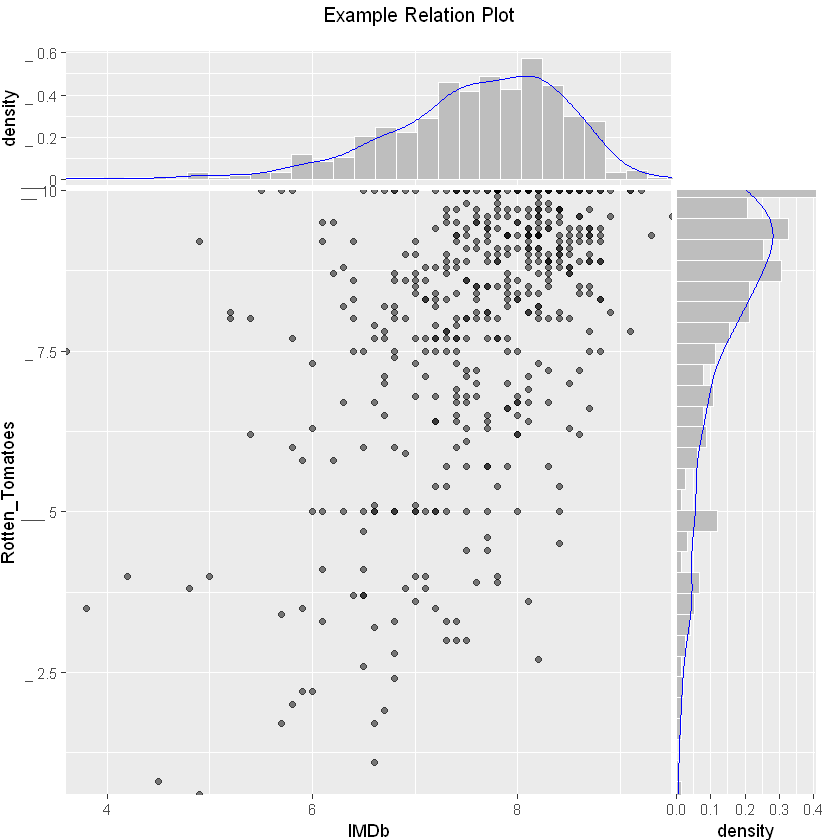

In [4]:
ScatterHist(shows,
            'IMDb',
            'Rotten_Tomatoes',
            smoothmethod = 'none', 
            title = 'Example Relation Plot',
            estimate_sig = TRUE)

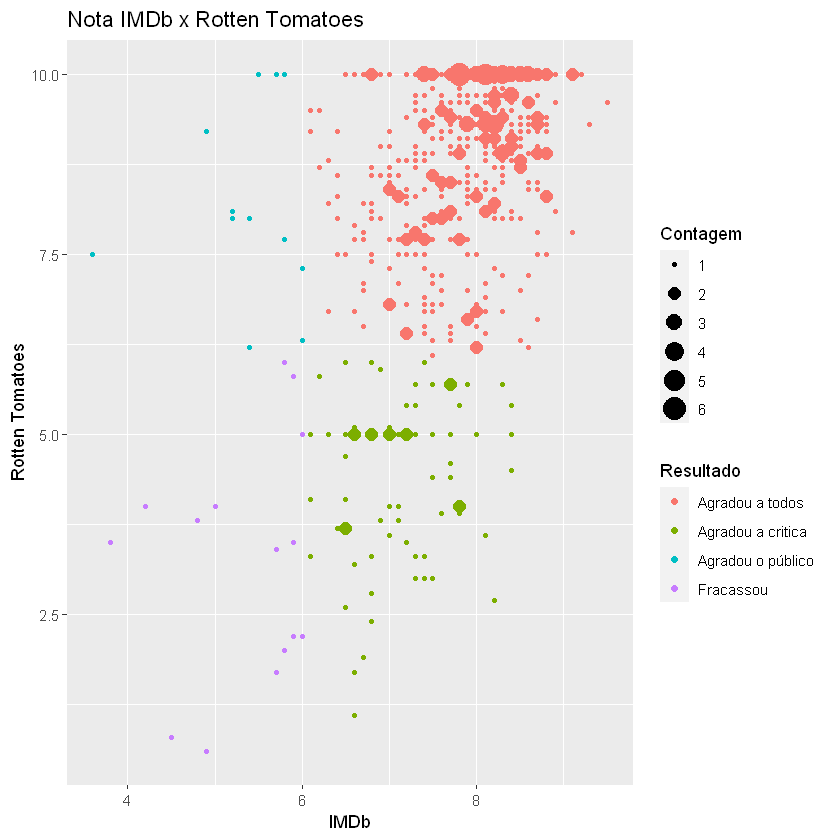

In [5]:
colors <- rev(RColorBrewer::brewer.pal(n = 4,
                                       name = 'Blues'))

data %>% ggplot(aes(x = IMDb, y = Rotten_Tomatoes, size = Contagem, color = Resultado)) +
labs(x = 'IMDb', y = 'Rotten Tomatoes', title = 'Nota IMDb x Rotten Tomatoes') + 
scale_fill_manual(values = colors) +
geom_point()

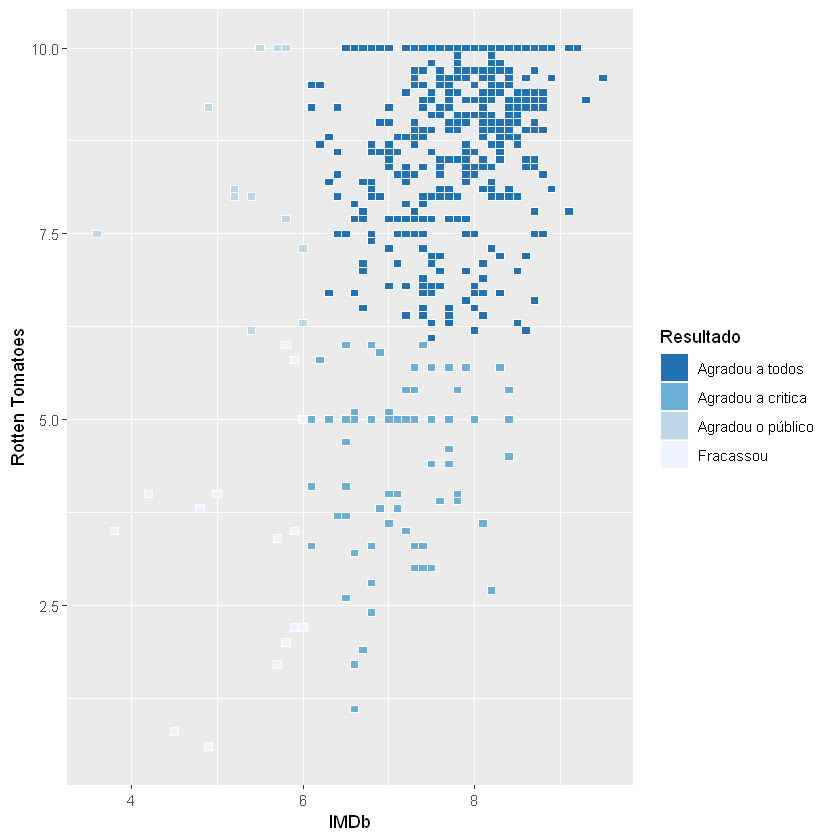

In [6]:
colors <- rev(RColorBrewer::brewer.pal(n = 4,
                                       name = 'Blues'))

heatmap <- ggplot(data, aes(x = IMDb, y = Rotten_Tomatoes, fill = Resultado)) +
           geom_tile(colour = 'white', size = 0.2) +
           labs(x = 'IMDb', y = 'Rotten Tomatoes') +
           scale_fill_manual(values = colors)

heatmap

In [7]:
# library
library(ggplot2)
library(ggExtra)
 
# The mtcars dataset is proposed in R
head(mtcars)
 
# classic plot :
p <- ggplot(mtcars, aes(x=wt, y=mpg, color=cyl, size=cyl)) +
      geom_point() +
      theme(legend.position="none")
 
# with marginal histogram
p1 <- ggMarginal(p, type="histogram")
 
# marginal density
p2 <- ggMarginal(p, type="density")
 
# marginal boxplot
p3 <- ggMarginal(p, type="boxplot")

Warning message:
"package 'ggExtra' was built under R version 3.6.3"


ERROR: Error: package or namespace load failed for 'ggExtra' in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace 'htmltools' 0.3.6 is already loaded, but >= 0.5.0.9001 is required
